<a href="https://colab.research.google.com/github/NicolasCampana/python-seminar/blob/master/PythonSeminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Welcome to this Notebook!
# This notebook was created to support a python seminar in 2020.




# Parte I - Web Scraping


In [0]:
class Client(object):
  def __init__(self, name:str = "", time:int = 0, frequency:str = 0):
    self.client_name = name
    self.time_to_clean = int(time)
    self.frequency = frequency

  def __str__(self):
    return f"Client: {self.client_name}. Time to Clean: {self.time_to_clean}. Week Frequency: {self.frequency}"

In [0]:
import requests
from bs4 import BeautifulSoup

class WebScraping(object):
  def __init__(self, url):
    self.url = url

  def request(self):
    return requests.get(self.url)

  def execute(self):
    clients = {}
    clients_class = []
    response = self.request()
    
    if(response.status_code != 404):
      soup = BeautifulSoup(response.text, "html.parser")
      table = soup.find("table")
      rows = table.find_all('tr')
      for idx, row in enumerate(rows[1:]):
        client_raw = row.find_all('td')
        client_data = [e.text for e in client_raw]
        result = " - ".join(client_data)
        print(f"Client {idx}: {result}")
        clients[idx] = client_data
        clients_class.append(Client(*list(client_data)))
    return clients_class


In [6]:
import requests
from bs4 import BeautifulSoup

url = "https://nicolascampana.github.io/python-seminar/"
wb = WebScraping(url)

clients = wb.execute()

for c in clients:
  print(c)

Client 0: Ristorante CruftMan - 20 - 4
Client 1: Trattoria Motocicleta - 25 - 2
Client 2: Trattoria Durani - 50 - 7
Client 3: ToopService - 100 - 3
Client 4: Essecorta - 75 - 7
Client 5: Tutella - 25 - 5
Client 6: Kebab I - 15 - 7
Client 7: Kebab II - 35 - 7
Client 8: Pizzeria L'angolo di Sardegna - 45 - 3
Client 9: Dipartimento di Ingegneria - UNIMORE - 150 - 3
Client 10: Ottica Vede Bene - 70 - W
Client 11: LIDT - 60 - 5
Client 12: Pizzeria PiediGrots V - 15 - 2
Client 13: Cremeria di Gelatti Buoni - 20 - 6
Client 14: Uffici Via Sani - 200 - 1
Client 15: Banca UniDebit - 37 - 7
Client 16: Banca Specifico - 60 - 4
Client 17: MacDenalds - 45 - 6
Client 18: BurgerQueen - 35 - 6
Client 19: Hotel Tosta - 70 - S
Client: Ristorante CruftMan. Time to Clean: 20. Week Frequency: 4
Client: Trattoria Motocicleta. Time to Clean: 25. Week Frequency: 2
Client: Trattoria Durani. Time to Clean: 50. Week Frequency: 7
Client: ToopService. Time to Clean: 100. Week Frequency: 3
Client: Essecorta. Time to

# Parte II - File Excel


In [0]:
import pandas as pd
import numpy as np

def read_patterns(file:str):
  file = pd.read_excel(file)
  matrix = file.to_numpy()
  Q = {str(i):{} for i in file["Frequency"]}
  for pattern in matrix:
    frequency = str(pattern[0])
    type = pattern[1]
    Q[frequency][type] = list(pattern[2:])
  
  return Q


In [19]:
import pprint


pprint.pprint(read_patterns("patterns.xlsx"))

1
{'1': {1: [1, 0, 0, 0, 0, 0, 0],
       2: [0, 1, 0, 0, 0, 0, 0],
       3: [0, 0, 1, 0, 0, 0, 0],
       4: [0, 0, 0, 1, 0, 0, 0],
       5: [0, 0, 0, 0, 1, 0, 0],
       6: [0, 0, 0, 0, 0, 1, 0],
       7: [0, 0, 0, 0, 0, 0, 1]},
 '2': {8: [1, 0, 0, 1, 0, 0, 0],
       9: [1, 0, 0, 0, 0, 1, 0],
       10: [1, 0, 0, 0, 0, 0, 1],
       11: [0, 1, 0, 0, 0, 0, 1],
       12: [0, 1, 0, 0, 0, 1, 0],
       13: [0, 0, 1, 0, 0, 0, 1],
       14: [0, 0, 0, 1, 0, 0, 1]},
 '3': {15: [1, 0, 0, 1, 0, 0, 1],
       16: [1, 0, 1, 0, 0, 0, 1],
       17: [1, 0, 1, 0, 0, 1, 0],
       18: [1, 0, 0, 1, 0, 1, 0],
       19: [0, 1, 0, 1, 0, 1, 0],
       20: [0, 1, 0, 1, 0, 0, 1],
       21: [0, 1, 0, 0, 1, 0, 1]},
 '4': {22: [1, 0, 1, 0, 1, 0, 1],
       23: [1, 0, 1, 0, 1, 1, 0],
       24: [1, 0, 0, 1, 0, 1, 1],
       25: [0, 1, 0, 1, 0, 1, 1],
       26: [1, 0, 1, 1, 0, 0, 1],
       27: [1, 0, 0, 1, 1, 0, 1],
       28: [1, 1, 0, 0, 1, 0, 1]},
 '5': {29: [1, 1, 1, 0, 1, 0, 1],
       30: [1, 0,

# Parte III - Assignment Model


In [21]:
!pip install pulp

import pickle as pk
from pulp import *

class SolverAssignment:    
    def __init__(self, clients:list):
        self.clients = clients
        self.D = list(range(0,7))
        print("Starting the assignment for the clients: ")
        for c in self.clients:
          print(c)
    
    def get_client_patterns(self, patterns: dict):
        client_patterns = {}        
        for _, i in patterns.items():
            for idx, pat in i.items():
                client_patterns[idx] = pat 
        return client_patterns

    def solve_model(self, patterns:dict) -> dict:
        #Assignment Model - Pulp #
        client_patterns = self.get_client_patterns(patterns)
        model = LpProblem("Assignment Problem - Pulizia", LpMinimize)
        x = LpVariable.dicts("X", [(c, p) for c in self.clients 
                                          for p in client_patterns], 
                             0, None, LpBinary)
        z = LpVariable("Z", 0, None, LpInteger)
        beta = [0, 0,  0, 0, 0, 120, 120]
        model += z, "Minimize Total balance"
        
        for c in self.clients:
          model += lpSum([x[(c,p)] for p in patterns[c.frequency].keys()]) == 1
        
        for d in self.D:
          model += beta[d] + lpSum([lpSum([client_patterns[p][d] * x[(c,p)] * c.time_to_clean for c in self.clients]) for p in client_patterns.keys()]) <= z

        model.solve()

        total = [0] * len(self.D)
        daily_demand = {i: [] for i in self.D}
        assigned = {}
        patterns_choosed = [0] * (len(client_patterns)+1)
        for c in self.clients:
            for p in client_patterns:
                if(x[(c,p)].value() > 0.6):
                    assigned[c] = client_patterns[p]
                    patterns_choosed[p] += 1
                    for d, value in enumerate(patterns[c.frequency][p]):
                        if(value == 1):
                            daily_demand[d].append(pk.loads(pk.dumps(c)))
                            total[d] += c.time_to_clean
        return daily_demand, total, assigned, patterns_choosed


In [22]:
output_file = "OutputClients.xlsx"
patterns_raw = read_patterns("patterns.xlsx")
#print(patterns)
#clients_class

t = SolverAssignment(clients)
daily, total, assigned, patterns = t.solve_model(patterns_raw)
#print(patterns)
#pprint.pprint(patterns)

1
Starting the assignment for the clients: 
Client: Ristorante CruftMan. Time to Clean: 20. Week Frequency: 4
Client: Trattoria Motocicleta. Time to Clean: 25. Week Frequency: 2
Client: Trattoria Durani. Time to Clean: 50. Week Frequency: 7
Client: ToopService. Time to Clean: 100. Week Frequency: 3
Client: Essecorta. Time to Clean: 75. Week Frequency: 7
Client: Tutella. Time to Clean: 25. Week Frequency: 5
Client: Kebab I. Time to Clean: 15. Week Frequency: 7
Client: Kebab II. Time to Clean: 35. Week Frequency: 7
Client: Pizzeria L'angolo di Sardegna. Time to Clean: 45. Week Frequency: 3
Client: Dipartimento di Ingegneria - UNIMORE. Time to Clean: 150. Week Frequency: 3
Client: Ottica Vede Bene. Time to Clean: 70. Week Frequency: W
Client: LIDT. Time to Clean: 60. Week Frequency: 5
Client: Pizzeria PiediGrots V. Time to Clean: 15. Week Frequency: 2
Client: Cremeria di Gelatti Buoni. Time to Clean: 20. Week Frequency: 6
Client: Uffici Via Sani. Time to Clean: 200. Week Frequency: 1
Clie

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


# Parte IV - Ouput

In [0]:
import openpyxl as pyxl

class OutputResultsAssignment:
  def output_excel(self, daily_assignment:dict, assigned:dict, total:list, filename_assignment:str):
        print("Output - Excel")
        wb = pyxl.Workbook()
        ws1 = wb.active
        ws1.title = "Week Distributon"
        ws1.append(["Days"] + [v for v in total])
        ws1.append(["Room", "Lunedi", "Martedi", "Mercoledi", "Giovedi", "Venerdi", "Sabato", "Domenica"])
        
        j = 3
        for i, k in assigned.items(): 
            ws1.cell(j, 1, f"{i.client_name}")
            for idx, day in enumerate(k):
                ws1.cell(j, idx+2, day)
            j += 1 
        wb.save(filename_assignment)
        

In [24]:
#OutputResultsAssignment().output_excel_pandas(assigned)
output = OutputResultsAssignment().output_excel(daily, assigned, total, output_file)

Output - Excel


# Parte V - Analyse

In [26]:
import itertools

week = ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"]
# Which patterns are choosed by each client
for i, k in assigned.items():
  print(f"Client {i.client_name}, choosed the pattern: {k}" \
        f". It means that we will visit in the days: " + " - ".join([visits for visits in list(itertools.compress(week,k))]))

Client Ristorante CruftMan, choosed the pattern: [1, 0, 1, 0, 1, 0, 1]. It means that we will visit in the days: Lunedì - Mercoledì - Venerdì - Domenica
Client Trattoria Motocicleta, choosed the pattern: [1, 0, 0, 1, 0, 0, 0]. It means that we will visit in the days: Lunedì - Giovedì
Client Trattoria Durani, choosed the pattern: [1, 1, 1, 1, 1, 1, 1]. It means that we will visit in the days: Lunedì - Martedì - Mercoledì - Giovedì - Venerdì - Sabato - Domenica
Client ToopService, choosed the pattern: [1, 0, 1, 0, 0, 1, 0]. It means that we will visit in the days: Lunedì - Mercoledì - Sabato
Client Essecorta, choosed the pattern: [1, 1, 1, 1, 1, 1, 1]. It means that we will visit in the days: Lunedì - Martedì - Mercoledì - Giovedì - Venerdì - Sabato - Domenica
Client Tutella, choosed the pattern: [1, 1, 1, 0, 1, 0, 1]. It means that we will visit in the days: Lunedì - Martedì - Mercoledì - Venerdì - Domenica
Client Kebab I, choosed the pattern: [1, 1, 1, 1, 1, 1, 1]. It means that we wil

In [27]:
# Total work
for i, k in enumerate(total):
  print(f"In {week[i]}, we have a total of {k} minutes of work.")

In Lunedì, we have a total of 687 minutes of work.
In Martedì, we have a total of 662 minutes of work.
In Mercoledì, we have a total of 647 minutes of work.
In Giovedì, we have a total of 677 minutes of work.
In Venerdì, we have a total of 687 minutes of work.
In Sabato, we have a total of 567 minutes of work.
In Domenica, we have a total of 557 minutes of work.


The mean value is 640.5714285714286
The standard deviation is 55.581343221315855
The day that we work more is 687, and the less 557


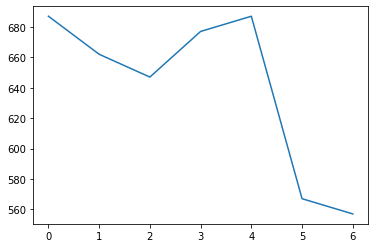

In [0]:
from matplotlib import pyplot as plt
# Media e deviazione Tempo
data = pd.Series(total)
data.plot()
print(f"The mean value is {data.mean()}")
print(f"The standard deviation is {data.std()}")
print(f"The day that we work more is {data.max()}, and the less {data.min()}")

The mean value is 13
The standard deviation is 2
The day that we work more is 16, and the less 9


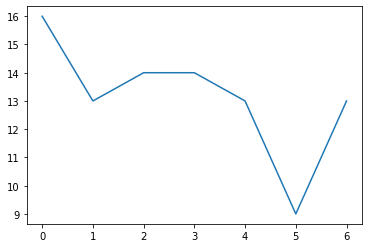

In [0]:
# Media e deviazione number of clients
data = pd.Series([len(k) for i,k in daily.items()])
data.plot()
print(f"The mean value is {int(data.mean())}")
print(f"The standard deviation is {int(data.std())}")
print(f"The day that we work more is {data.max()}, and the less {data.min()}")

The most choosed pattern have 5 times, and the less 0 times.
And the pattern most choosed pattern is 43!


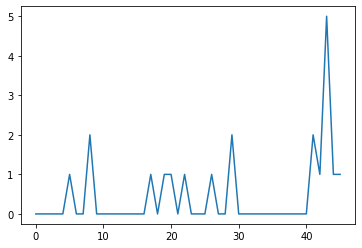

In [0]:
# The patterns
data = pd.Series(patterns)
data.plot()
print(f"The most choosed pattern have {data.max()} times, and the less {data.min()} times.")
print(f"And the pattern most choosed pattern is {data.argmax()}!")


In [0]:
# Week work time
hour_cost = 10
daily_costs = []
for day, time in enumerate(total):
  cost = round(time/hour_cost,2)
  print(f"In {week[day]}, We will pay {cost}")
  daily_costs.append(cost)
  
print(f"Each week costs {sum([c for c in daily_costs])}")

In Lunedì, We will pay 68.7
In Martedì, We will pay 66.2
In Mercoledì, We will pay 64.7
In Giovedì, We will pay 67.7
In Venerdì, We will pay 68.7
In Sabato, We will pay 56.7
In Domenica, We will pay 55.7
Each week costs 448.4


In [28]:
!pip install flask-ngrok

In [29]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run@app.route("/")
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
  
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6785802b.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Apr/2020 15:37:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 15:37:05] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Apr/2020 15:37:05] "GET /favicon.ico HTTP/1.1" 404 -
